# Evaluate Geometrical Brownian Motion Parameters

Import libraries

In [ ]:
import os
from src.gbm import (read_data_pickle, get_all_indices, drift_sigma_maxlikelihood,
                     compute_gbm_params, linear_regression_fit, plot_kde, plot_drift_vs_sigma_fit)

Compute GBM parameters and fit them with linear function.

Processing CAC index
n_years 16 n_samples 15
n_years 16 n_samples 15
n_years 16 n_samples 15
n_years 16 n_samples 15
n_years 16 n_samples 15
n_years 16 n_samples 15
n_years 16 n_samples 15
n_years 16 n_samples 15
n_years 16 n_samples 15
n_years 16 n_samples 15
n_years 16 n_samples 15
n_years 16 n_samples 15
n_years 16 n_samples 15
n_years 16 n_samples 15
n_years 16 n_samples 15
n_years 16 n_samples 15
n_years 16 n_samples 15
n_years 16 n_samples 15
n_years 16 n_samples 15
n_years 16 n_samples 15
n_years 16 n_samples 15
n_years 16 n_samples 15
n_years 16 n_samples 15
n_years 16 n_samples 15
n_years 16 n_samples 15
n_years 16 n_samples 15
n_years 16 n_samples 15
n_years 16 n_samples 15
n_years 16 n_samples 15
n_years 16 n_samples 15
n_years 16 n_samples 15
n_years 16 n_samples 15
n_years 16 n_samples 15
n_years 16 n_samples 15
n_years 16 n_samples 15
n_years 16 n_samples 15
n_years 16 n_samples 15
n_years 16 n_samples 15
n_years 16 n_samples 15


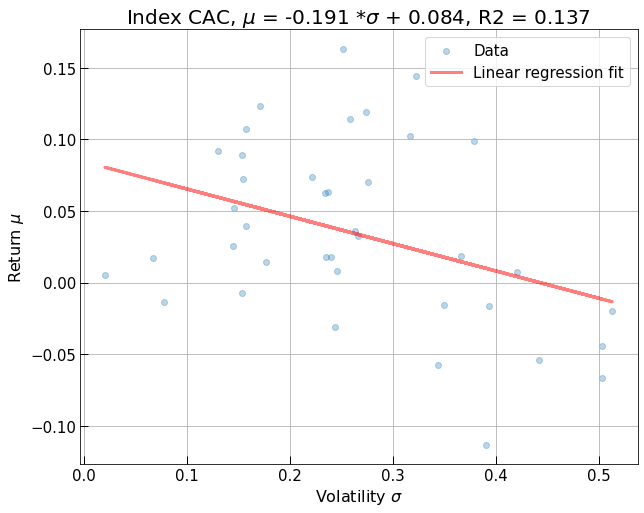

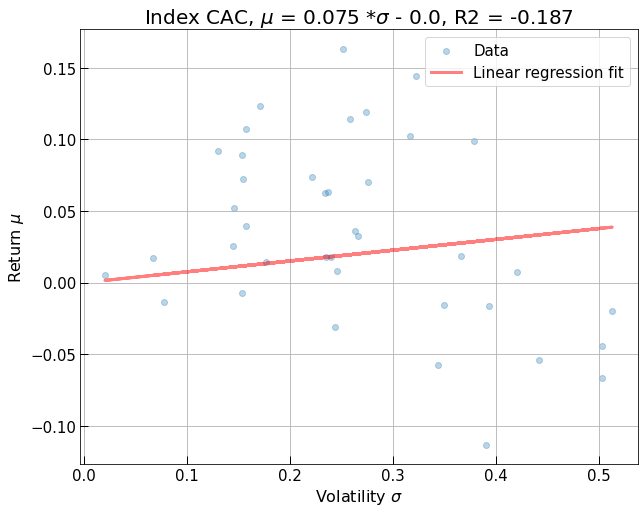

In [70]:
#index_list = get_all_indices(exclude_indices=True)
index_list = ['CAC']

FILEPATH = "data/all_indexes_2006-01-01_2021-12-31.pickle"
data = read_data_pickle(FILEPATH)

DIR = 'results/gbm_parameters'
DIR_KDE = 'results/gbm_parameters/kde'
DIR_KDE_FIT = 'results/gbm_parameters/kde_fit'

for dir in [DIR, DIR_KDE, DIR_KDE_FIT]:
    os.makedirs(dir, exist_ok=True)

results_fit = []

for index_name in index_list:
    
    print(f"Processing {index_name} index")
    
    df = compute_gbm_params(data, index_name)

    ## === Drift and sigma KDE === #
    #title = 'GBM drift distribution. Index {}'.format(index_name)
    #filename = '{}/kde_drift_index_{}.png'.format(DIR_KDE, index_name)
    #plot_kde(df.drift, title, 'Drift', filename)
    #plot_histogram(df.mu)

    #title = 'GBM volatility distribution. Index {}'.format(index_name)
    #filename = '{}/kde_sigma_index_{}.png'.format(DIR_KDE, index_name)
    #plot_kde(df.sigma, title, 'Volatility', filename) 

    # === Fit sigma vs drift with linear regression === #
    for fit_intercept in [True, False]:
        fit_params = linear_regression_fit(df = df, fit_intercept = fit_intercept, index_name = index_name, dir = DIR)
        fit_params['intercept'] = fit_intercept
        results_fit.append(fit_params)

    #    #### plot them together and see if there is a match
    #    sns.kdeplot(df.drift, label='drift')
    #    sns.kdeplot(fit_params['a']*df.sigma, label='a*sigma')
    #    plt.title(f'Distribution of sigma and mu for {index_name}')
    #    plt.grid()
    #    plt.legend(['drift', '{0:.3f}*sigma'.format(fit_params['a'])])
    #    plt.savefig(f'{DIR_KDE_FIT}/kde_drift_sigma_index_{index_name}_fit_intercept_{fit_intercept}.png')
    #    plt.show()

df_fit = pd.DataFrame.from_dict(results_fit, orient='columns')

In [59]:
df_fit['a'].iloc[0]

-0.2742330334388679

In [65]:
df_fit

,index,a,b,r2,corr,intercept
0,SPX,-0.019446,0.056739,0.002336,0.606259,True
1,SPX,0.143435,0.000000,-0.226654,0.606259,False
2,CCMP,-0.001818,0.020450,0.000036,0.746776,True
3,CCMP,0.044384,0.000000,-0.036915,0.746776,False
4,RIY,-0.022084,0.055104,0.003607,0.664637,True
...,...,...,...,...,...,...
63,MXIN,0.205837,0.000000,-0.619433,0.581495,False
64,SHCOMP,-0.000521,0.066069,0.000001,0.699797,True
65,SHCOMP,0.119703,0.000000,-0.057996,0.699797,False
66,SHSZ300,0.026514,0.041885,0.004594,0.762396,True


In [66]:
df_fit_icpt = df_fit[df_fit.intercept == True]
df_fit_no_icpt = df_fit[df_fit.intercept == False]

In [72]:
df_fit_no_icpt.to_latex()

/tmp/ipykernel_13764/3329116130.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df_fit_no_icpt.to_latex()


'\\begin{tabular}{llrrrrl}\n\\toprule\n{} &    index &         a &    b &        r2 &      corr &  intercept \\\\\n\\midrule\n1  &      SPX &  0.143435 &  0.0 & -0.226654 &  0.606259 &      False \\\\\n3  &     CCMP &  0.044384 &  0.0 & -0.036915 &  0.746776 &      False \\\\\n5  &      RIY &  0.130017 &  0.0 & -0.243982 &  0.664637 &      False \\\\\n7  &      RTY &  0.066248 &  0.0 & -0.085767 &  0.752064 &      False \\\\\n9  &      RAY &  0.085020 &  0.0 & -0.134234 &  0.723667 &      False \\\\\n11 &      RLV &  0.108034 &  0.0 & -0.262144 &  0.697238 &      False \\\\\n13 &      RLG &  0.157010 &  0.0 & -0.213372 &  0.647695 &      False \\\\\n15 &      NBI &  0.065311 &  0.0 & -0.107508 &  0.810901 &      False \\\\\n17 &   S5COND &  0.137310 &  0.0 & -0.168763 &  0.542322 &      False \\\\\n19 &   S5CONS &  0.209130 &  0.0 & -0.656446 &  0.245300 &      False \\\\\n21 &   S5ENRS &  0.018544 &  0.0 & -0.031283 &  0.582485 &      False \\\\\n23 &   S5FINL &  0.031161 &  0.0 & -0.

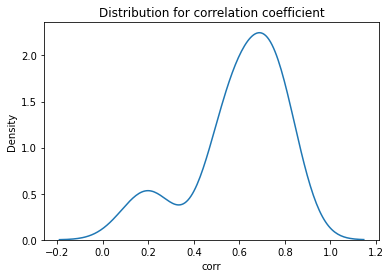

In [68]:
sns.kdeplot(df_fit_icpt['corr'])
plt.title('Distribution for correlation coefficient')
plt.savefig(f'{DIR}/kde_corr.png')
plt.show()

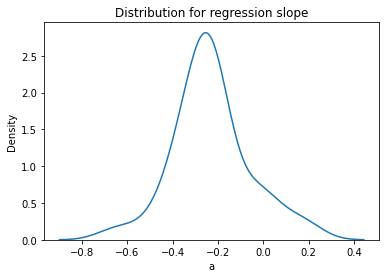

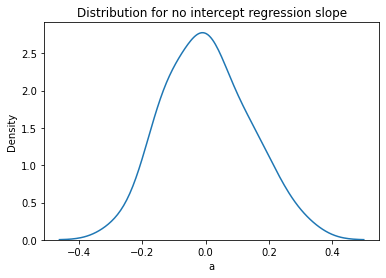

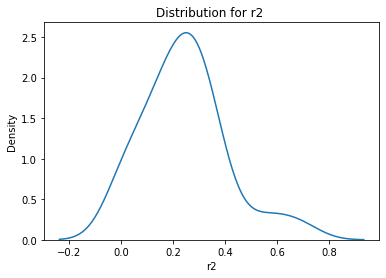

TypeError: object of type 'method' has no len()

In [23]:
sns.kdeplot(df_fit_icpt.a)
plt.title('Distribution for regression slope')
plt.savefig(f'{DIR}/kde_regression_slope.png')
plt.show()

sns.kdeplot(df_fit_no_icpt.a)
plt.title('Distribution for no intercept regression slope')
plt.savefig(f'{DIR}/kde_regression_slope_no_intercept.png')
plt.show()

sns.kdeplot(df_fit_icpt.r2)
plt.title('Distribution for r2 ')
plt.savefig(f'{DIR}/kde_r2.png')
plt.show()

sns.kdeplot(df_fit_icpt.corr)
plt.title('Distribution for correlation coefficient')
plt.savefig(f'{DIR}/kde_corr.png')
plt.show()

In [ ]:
df_fit_icpt.plot(x='a', y='r2', kind='scatter')
